Dataset Shape: (100000, 14)

Column Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   100000 non-null  int64  
 1   course_id                 100000 non-null  int64  
 2   course_name               100000 non-null  object 
 3   instructor                100000 non-null  object 
 4   course_duration_hours     100000 non-null  float64
 5   certification_offered     100000 non-null  object 
 6   difficulty_level          100000 non-null  object 
 7   rating                    100000 non-null  float64
 8   enrollment_numbers        100000 non-null  int64  
 9   course_price              100000 non-null  float64
 10  feedback_score            100000 non-null  float64
 11  study_material_available  100000 non-null  object 
 12  time_spent_hours          100000 non-null  float64


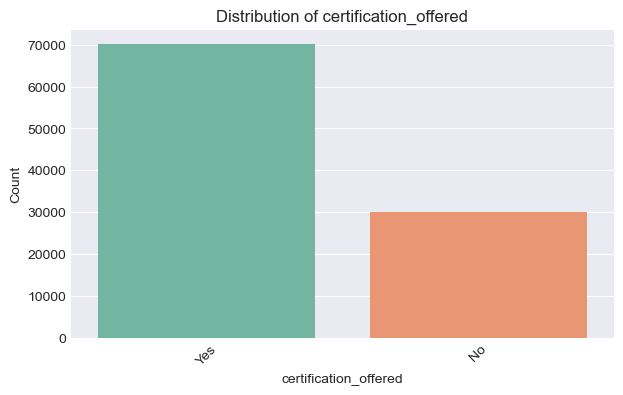

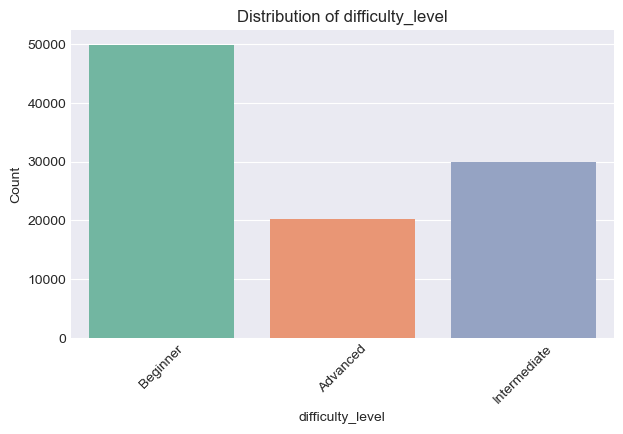

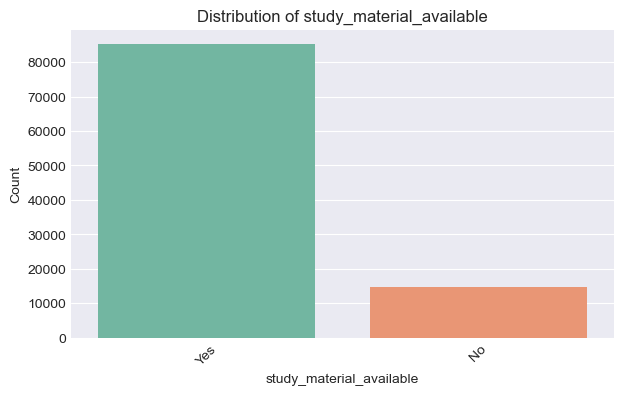

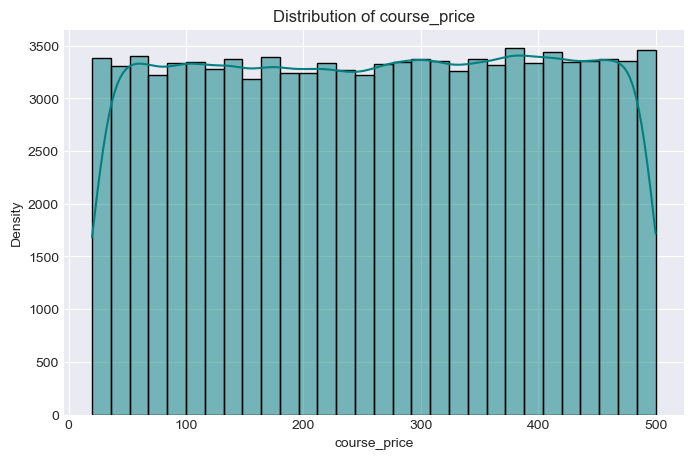

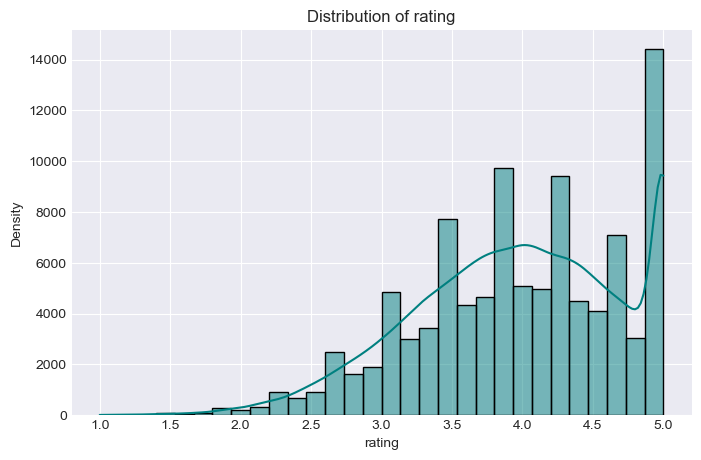

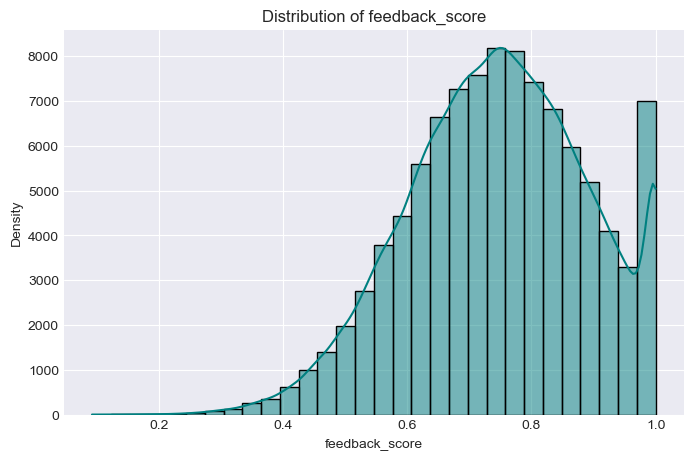

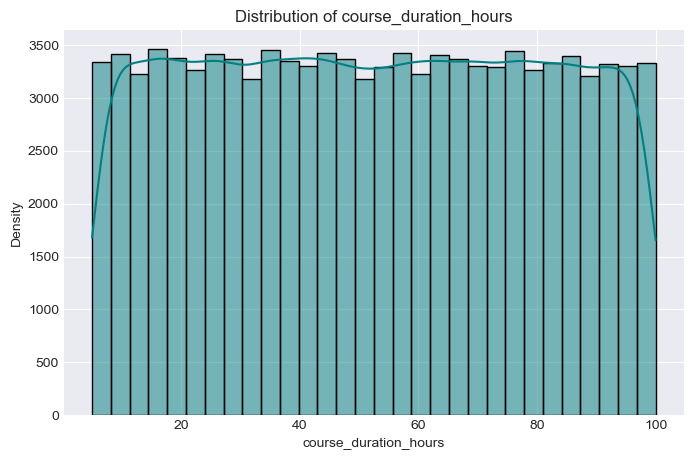

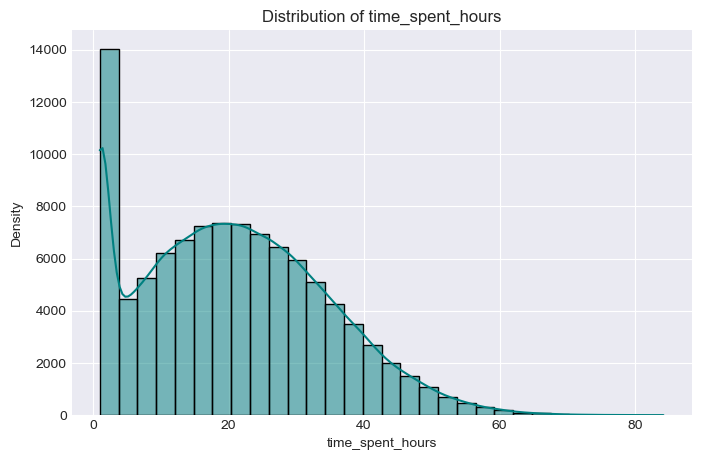

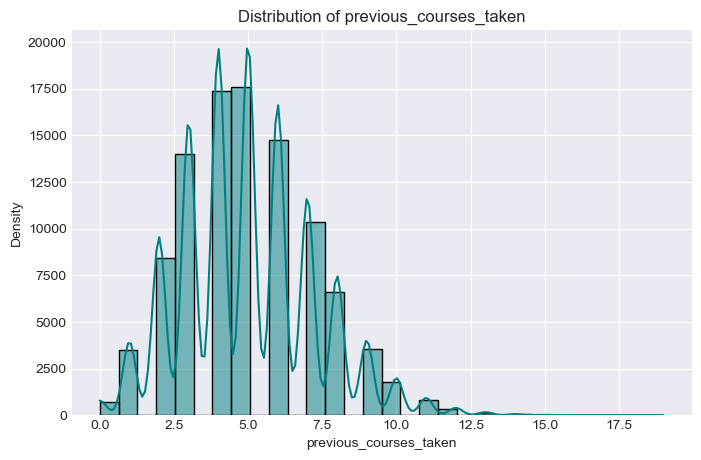

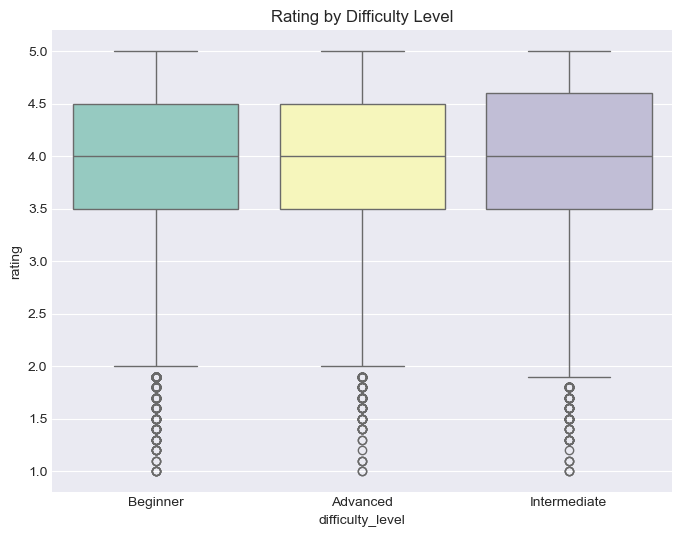

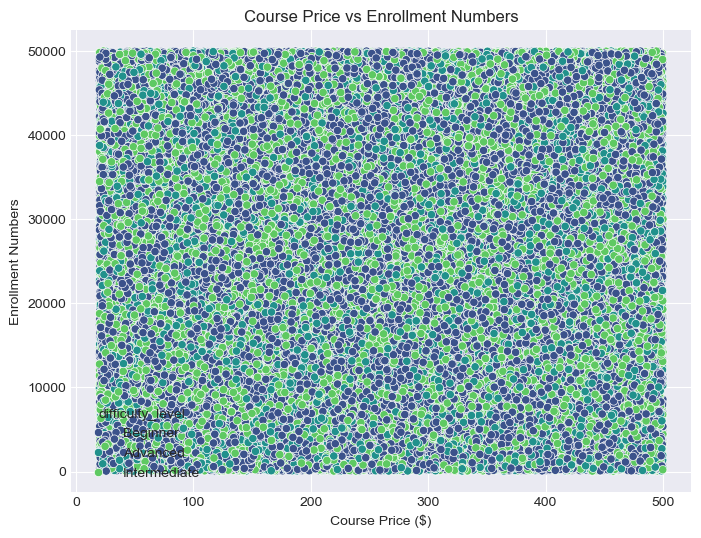

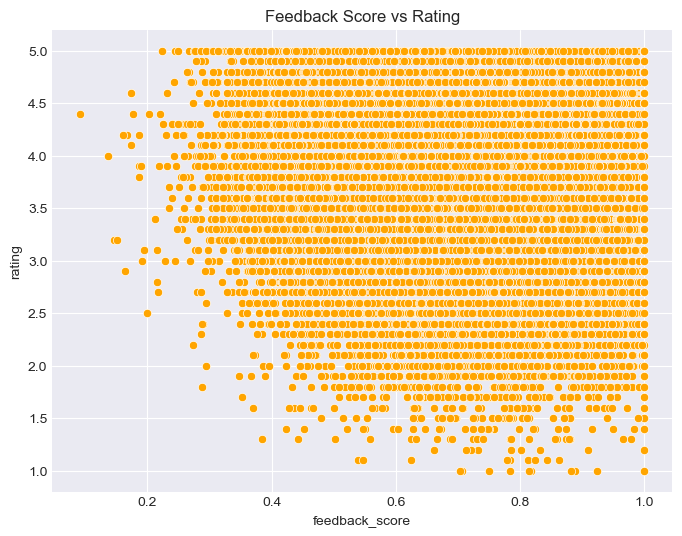

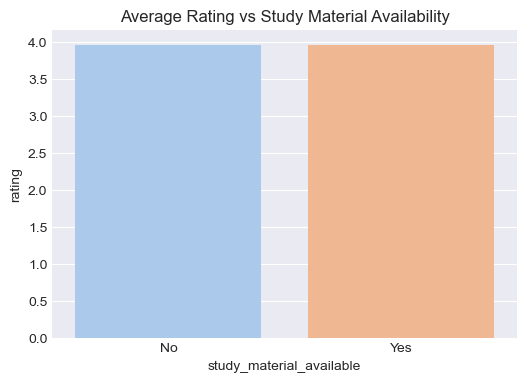

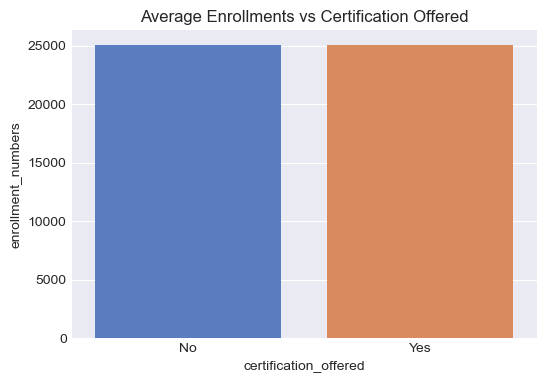

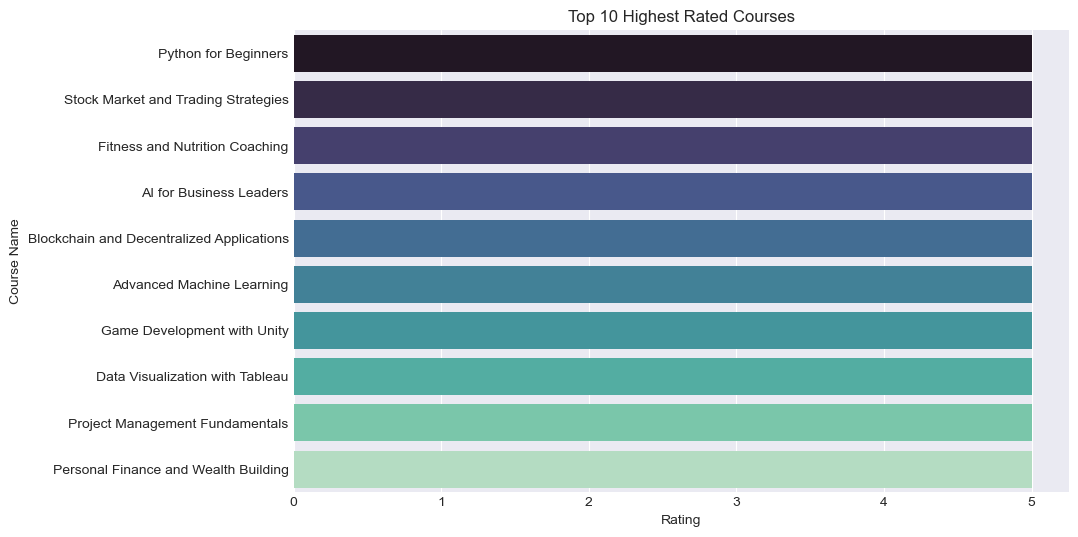

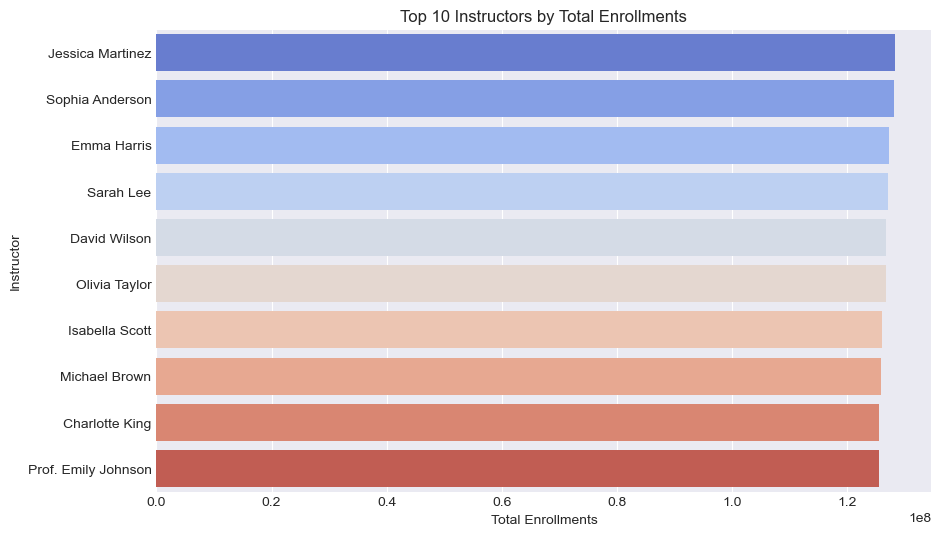

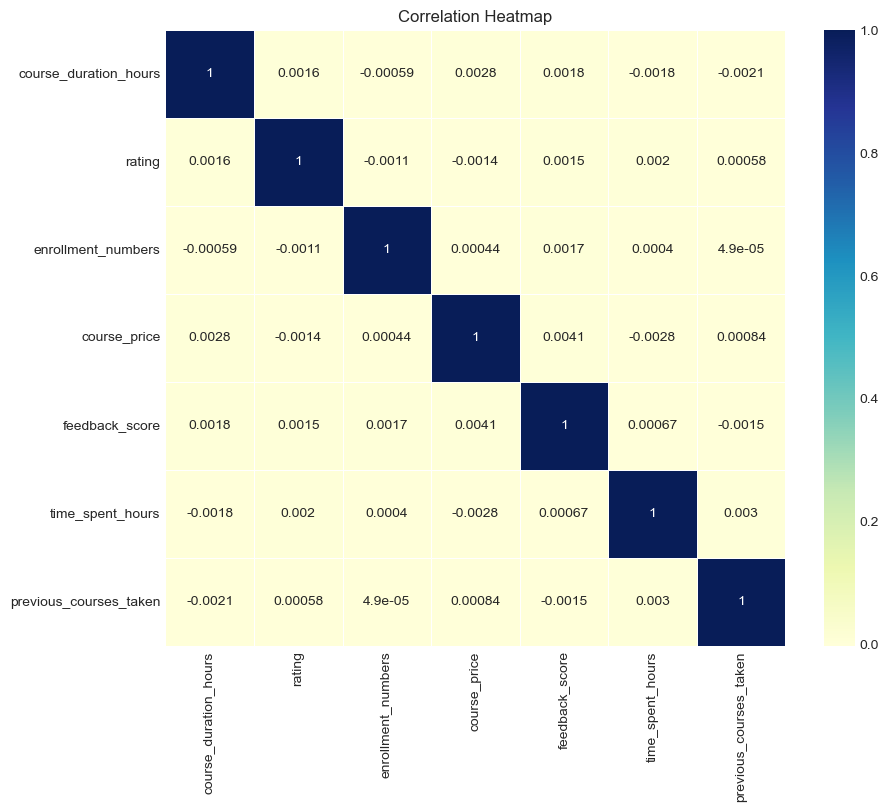

No missing values detected!

✅ EDA Completed Successfully!


In [1]:
# 🚀 EDA for Online Course Recommendation System
# Author: [Your Name Here]
# Date: [Today’s Date]
# Purpose: Real-time Data Science Level EDA

# 1. 📚 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')

# 2. 📂 Load the Dataset
file_path = 'online_course_recommendation_v2 - Sheet1.csv'
df = pd.read_csv(file_path)

# 3. 🧹 Basic Information
print("Dataset Shape:", df.shape)
print("\nColumn Information:\n")
print(df.info())
print("\nMissing Values:\n")
print(df.isnull().sum())
print("\nSummary Statistics:\n")
print(df.describe())

# 4. 🔎 Univariate Analysis (Single Feature Exploration)

# A. Categorical Features
categorical_features = ['certification_offered', 'difficulty_level', 'study_material_available']

for col in categorical_features:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# B. Numerical Features
numerical_features = ['course_price', 'rating', 'feedback_score', 'course_duration_hours', 'time_spent_hours', 'previous_courses_taken']

for col in numerical_features:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

# 5. 🔥 Bivariate Analysis (Feature Relationships)

# Rating vs Difficulty Level
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='difficulty_level', y='rating', palette='Set3')
plt.title('Rating by Difficulty Level')
plt.show()

# Course Price vs Enrollment Numbers
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='course_price', y='enrollment_numbers', hue='difficulty_level', palette='viridis')
plt.title('Course Price vs Enrollment Numbers')
plt.xlabel('Course Price ($)')
plt.ylabel('Enrollment Numbers')
plt.show()

# Feedback Score vs Rating
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='feedback_score', y='rating', color='orange')
plt.title('Feedback Score vs Rating')
plt.show()

# Study Material Available vs Average Rating
study_material_rating = df.groupby('study_material_available')['rating'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=study_material_rating, x='study_material_available', y='rating', palette='pastel')
plt.title('Average Rating vs Study Material Availability')
plt.show()

# Certification Offered vs Enrollment Numbers
certification_enrollment = df.groupby('certification_offered')['enrollment_numbers'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=certification_enrollment, x='certification_offered', y='enrollment_numbers', palette='muted')
plt.title('Average Enrollments vs Certification Offered')
plt.show()

# 6. 🏆 Top Performers

# Top 10 Courses by Rating
top_courses = df[['course_name', 'rating']].sort_values(by='rating', ascending=False).drop_duplicates().head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_courses, x='rating', y='course_name', palette='mako')
plt.title('Top 10 Highest Rated Courses')
plt.xlabel('Rating')
plt.ylabel('Course Name')
plt.show()

# Top 10 Instructors by Enrollment
top_instructors = df.groupby('instructor')['enrollment_numbers'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_instructors.values, y=top_instructors.index, palette='coolwarm')
plt.title('Top 10 Instructors by Total Enrollments')
plt.xlabel('Total Enrollments')
plt.ylabel('Instructor')
plt.show()

# 7. 🧠 Correlation Analysis

plt.figure(figsize=(10,8))
corr_matrix = df[['course_duration_hours', 'rating', 'enrollment_numbers', 'course_price', 'feedback_score', 'time_spent_hours', 'previous_courses_taken']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 8. 🧼 Missing Data Handling (If Any)

missing_values = df.isnull().sum()
if missing_values.any():
    print("Handling Missing Values...")
    # Example: Fill missing numerical with median
    for col in numerical_features:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
    # Example: Fill categorical missing with mode
    for col in categorical_features:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)
    print("Missing values handled.")
else:
    print("No missing values detected!")

# ✅ EDA Completed
print("\n✅ EDA Completed Successfully!")


# Automated EDA Report Sweetviz 


In [14]:
df.columns

Index(['user_id', 'course_id', 'course_name', 'instructor',
       'course_duration_hours', 'certification_offered', 'difficulty_level',
       'rating', 'enrollment_numbers', 'course_price', 'feedback_score',
       'study_material_available', 'time_spent_hours',
       'previous_courses_taken', 'difficulty_encoded', 'combined_features',
       'engagement_score', 'price_category', 'high_feedback'],
      dtype='object')

In [2]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Install Sweetviz
!pip install sweetviz

# Import
import sweetviz as sv
import pandas as pd

# Load data
file_path = 'online_course_recommendation_v2 - Sheet1.csv'
df = pd.read_csv(file_path)

# Create Sweetviz Report
report = sv.analyze(df)

# Save Report
report.show_html('Sweetviz_EDA_Report.html')


Unable to create process using 'C:\Users\M Bhuvaneshsaikumar\anaconda3\python.exe "C:\Users\M Bhuvaneshsaikumar\anaconda3\Scripts\pip-script.py" install sweetviz'


                                             |                                             | [  0%]   00:00 ->…

Report Sweetviz_EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Model Building

In [4]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Load data
file_path = 'online_course_recommendation_v2 - Sheet1.csv'
df = pd.read_csv(file_path)

# Basic preprocessing
df['course_name'] = df['course_name'].fillna('')
df['instructor'] = df['instructor'].fillna('Unknown')

# Encode 'difficulty_level' numerically
difficulty_map = {'Beginner': 1, 'Intermediate': 2, 'Advanced': 3}
df['difficulty_encoded'] = df['difficulty_level'].map(difficulty_map)

# Create combined features for Content-Based
df['combined_features'] = df['course_name'] + " " + df['instructor'] + " " + df['difficulty_level']

print("✅ Preprocessing Done")


✅ Preprocessing Done


In [5]:
# 🚀 Feature Engineering
def feature_engineering(df):
    # 1. Engagement Score
    df['engagement_score'] = df['time_spent_hours'] / df['course_duration_hours']
    df['engagement_score'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df['engagement_score'].fillna(0, inplace=True)

    # 2. Price Category
    df['price_category'] = pd.cut(
        df['course_price'],
        bins=[-1, 50, 200, np.inf],
        labels=['Low', 'Medium', 'High']
    )

    # 3. High Feedback Label
    df['high_feedback'] = np.where(df['feedback_score'] >= 4.0, 1, 0)

    print("\n✅ Feature Engineering Completed!")
    print("\n🔎 New Features Added:")
    print(df[['engagement_score', 'price_category', 'high_feedback']].head())

    return df

# 🚀 Feature Selection
def feature_selection(df, corr_threshold=0.85):
    # Correlation Matrix
    corr_matrix = df.select_dtypes(include=np.number).corr().abs()

    # Upper Triangle of Correlation Matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find Features with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > corr_threshold)]

    df_reduced = df.drop(columns=to_drop)

    print("\n✅ Feature Selection Completed!")
    print(f"\n📌 Dropping {len(to_drop)} Highly Correlated Features: {to_drop}")
    print(f"\n✅ Remaining Features ({len(df_reduced.columns)} total): {list(df_reduced.columns)}")

    return df_reduced


In [6]:
df = feature_engineering(df)
df = feature_selection(df)



✅ Feature Engineering Completed!

🔎 New Features Added:
   engagement_score price_category  high_feedback
0          0.450128           High              0
1          0.798072            Low              0
2          3.913433           High              0
3          0.382333           High              0
4          0.714610           High              0

✅ Feature Selection Completed!

📌 Dropping 0 Highly Correlated Features: []

✅ Remaining Features (19 total): ['user_id', 'course_id', 'course_name', 'instructor', 'course_duration_hours', 'certification_offered', 'difficulty_level', 'rating', 'enrollment_numbers', 'course_price', 'feedback_score', 'study_material_available', 'time_spent_hours', 'previous_courses_taken', 'difficulty_encoded', 'combined_features', 'engagement_score', 'price_category', 'high_feedback']


In [7]:
# Create user-item matrix
user_item_matrix = df.pivot_table(index='user_id', columns='course_id', values='rating')

# Fill NaN with 0
user_item_matrix.fillna(0, inplace=True)

# Calculate similarity
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

print("✅ Collaborative Filtering Matrix Ready")


✅ Collaborative Filtering Matrix Ready


In [8]:
from sklearn.neighbors import NearestNeighbors

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['combined_features'])

# Using Nearest Neighbors instead of full Cosine Matrix
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(tfidf_matrix)

print("✅ Content-Based KNN Model Ready (Big Data Optimized)")


✅ Content-Based KNN Model Ready (Big Data Optimized)


In [9]:
def hybrid_recommendation(user_id, course_title, n_recommendations=5, alpha=0.5):
    """
    Generate hybrid recommendations using content and collaborative filtering.
    
    Parameters:
        user_id (int): ID of the user for collaborative filtering
        course_title (str): Course to base content similarity on
        n_recommendations (int): Number of final recommendations
        alpha (float): Weight for blending (0 = pure CF, 1 = pure Content-Based)
    """
    # ----- Content-Based Part -----
    course_idx = df[df['course_name'].str.lower() == course_title.lower()].index
    if len(course_idx) == 0:
        return []

    distances, indices = model_knn.kneighbors(tfidf_matrix[course_idx], n_neighbors=20)
    content_scores = {}
    for i, idx in enumerate(indices.flatten()):
        if idx == course_idx[0]:
            continue
        course_id = df.iloc[idx]['course_id']
        content_scores[course_id] = 1 - distances.flatten()[i]  # cosine distance to similarity

    # ----- Collaborative Filtering Part -----
    if user_id not in user_similarity_df.index:
        return list(df[df['course_name'].str.lower() != course_title.lower()]['course_name'].sample(n=n_recommendations))

    user_ratings = user_item_matrix.loc[user_id]
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:11]  # skip self

    collaborative_scores = {}
    for sim_user_id, similarity in similar_users.items():
        sim_user_ratings = user_item_matrix.loc[sim_user_id]
        for course_id, rating in sim_user_ratings.items():
            if user_ratings[course_id] == 0:  # only consider unseen items
                collaborative_scores[course_id] = collaborative_scores.get(course_id, 0) + similarity * rating

    # ----- Combine Scores -----
    final_scores = {}
    all_course_ids = set(content_scores.keys()) | set(collaborative_scores.keys())
    for course_id in all_course_ids:
        content_score = content_scores.get(course_id, 0)
        collab_score = collaborative_scores.get(course_id, 0)
        final_scores[course_id] = alpha * content_score + (1 - alpha) * collab_score

    # ----- Sort and Recommend -----
    top_courses = sorted(final_scores.items(), key=lambda x: x[1], reverse=True)[:n_recommendations]
    recommended_course_names = df[df['course_id'].isin([c[0] for c in top_courses])]['course_name'].tolist()

    return recommended_course_names


In [10]:
recommendations = hybrid_recommendation(user_id=30, course_title="Python for Beginners", n_recommendations=5, alpha=0.6)
print("Hybrid Recommendations:", recommendations)


Hybrid Recommendations: ['Personal Finance and Wealth Building', 'Stock Market and Trading Strategies', 'Blockchain and Decentralized Applications', 'Networking and System Administration', 'Public Speaking Mastery', 'Cybersecurity for Professionals', 'Game Development with Unity', 'Python for Beginners', 'DevOps and Continuous Deployment', 'Fundamentals of Digital Marketing', 'Networking and System Administration', 'Graphic Design with Canva', 'Networking and System Administration', 'Fundamentals of Digital Marketing', 'Fundamentals of Digital Marketing', 'Fitness and Nutrition Coaching', 'Fitness and Nutrition Coaching', 'Fitness and Nutrition Coaching', 'Blockchain and Decentralized Applications', 'Python for Beginners', 'Python for Beginners', 'Project Management Fundamentals', 'Cybersecurity for Professionals', 'Python for Beginners', 'Networking and System Administration', 'Game Development with Unity', 'AI for Business Leaders', 'AI for Business Leaders', 'Mobile App Development 

In [11]:
print("🚀 Here are your personalized course recommendations:\n")
for idx, course in enumerate(recommendations, 1):
    print(f"{idx}. {course}")


🚀 Here are your personalized course recommendations:

1. Personal Finance and Wealth Building
2. Stock Market and Trading Strategies
3. Blockchain and Decentralized Applications
4. Networking and System Administration
5. Public Speaking Mastery
6. Cybersecurity for Professionals
7. Game Development with Unity
8. Python for Beginners
9. DevOps and Continuous Deployment
10. Fundamentals of Digital Marketing
11. Networking and System Administration
12. Graphic Design with Canva
13. Networking and System Administration
14. Fundamentals of Digital Marketing
15. Fundamentals of Digital Marketing
16. Fitness and Nutrition Coaching
17. Fitness and Nutrition Coaching
18. Fitness and Nutrition Coaching
19. Blockchain and Decentralized Applications
20. Python for Beginners
21. Python for Beginners
22. Project Management Fundamentals
23. Cybersecurity for Professionals
24. Python for Beginners
25. Networking and System Administration
26. Game Development with Unity
27. AI for Business Leaders
28. 

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['combined_features'])

# Cosine Similarity Matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

print("✅ Content-Based Cosine Similarity Matrix Ready")


MemoryError: Unable to allocate 41.2 GiB for an array with shape (5528591148,) and data type int64

In [17]:
# Install Pandas Profiling
!pip install ydata-profiling

# Import
from ydata_profiling import ProfileReport
import pandas as pd

# Load data
file_path = 'online_course_recommendation_v2 - Sheet1.csv'
df = pd.read_csv(file_path)


# Create Profile Report
profile = ProfileReport(df, title="Online Course EDA Report", explorative=True)

# Save Report
profile.to_file('PandasProfiling_EDA_Report.html')


Unable to create process using 'C:\Users\M Bhuvaneshsaikumar\anaconda3\python.exe "C:\Users\M Bhuvaneshsaikumar\anaconda3\Scripts\pip-script.py" install ydata-profiling'


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 408.87it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]